In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
from skimage.feature import hog
import os
import scipy.ndimage as ndi

In [4]:
path = '101'
classes = os.listdir(path)
classes

['accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'Faces',
 'Faces_easy',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'Leopards',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'Motorbikes',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooster',
 'saxophone',
 'schooner',
 'sc

In [5]:
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 

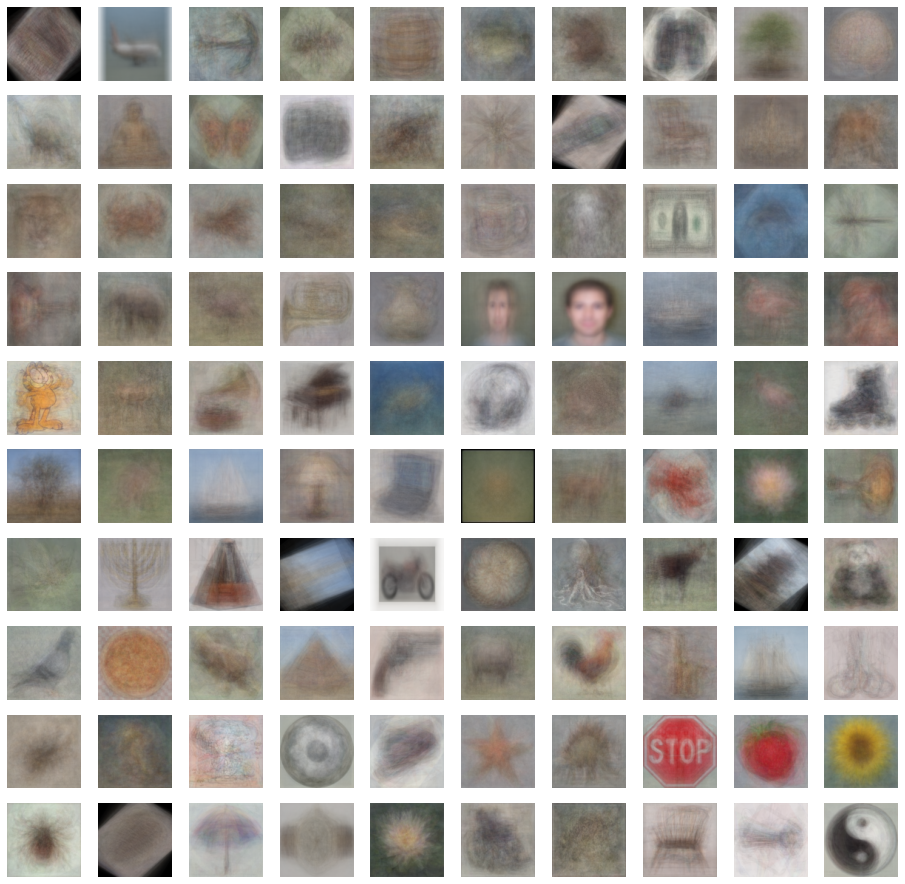

In [6]:
fig = plt.figure(figsize=(16,16))
rows = 10
cols = 10


img_h = []
img_w = []
img_count = []
for classnum in range(len(classes)):
    count = 0
    folder = path + '/' + classes[classnum]
    filelist = os.listdir(folder)
    avg = np.zeros((100,100,3))
    for i in range(len(filelist)):
        filename = folder + '/' + filelist[i]
        image = io.imread(filename)
        image = imNormalize(image)
        img_w.append(image.shape[0])
        img_h.append(image.shape[1])
        image = transform.resize(image,[100,100])
        avg += image
        count += 1
    img_count.append([count, classes[classnum]])
    avg = avg/len(filelist)
    fig.add_subplot(rows, cols, classnum + 1)
    plt.imshow(avg)
    plt.axis('off')
plt.show()

In [7]:
#for question 2
print("max images: ", max(img_count))
print("min images: ", min(img_count))
print("max/min height: ", max(img_h), min(img_h))
print("max/min width: ", max(img_w), min(img_w))

max images:  [800, 'airplanes']
min images:  [31, 'inline_skate']
max/min height:  708 80
max/min width:  494 92


In [8]:
# isolates the names of the classes after sorting them by image count
img_count.sort(reverse=True)
posclasses = img_count[0:1]
posclasses = [item[1] for item in posclasses]
negclasses = img_count[1:4]
negclasses = [item[1] for item in negclasses]
rest = img_count[4:]
rest = [item[1] for item in rest]
print(posclasses)
print(negclasses)
print(rest)

['airplanes']
['Motorbikes', 'Faces_easy', 'Faces']
['watch', 'Leopards', 'bonsai', 'ketch', 'chandelier', 'hawksbill', 'grand_piano', 'brain', 'butterfly', 'helicopter', 'menorah', 'trilobite', 'starfish', 'kangaroo', 'sunflower', 'ewer', 'buddha', 'scorpion', 'revolver', 'laptop', 'ibis', 'llama', 'minaret', 'umbrella', 'electric_guitar', 'crab', 'crayfish', 'cougar_face', 'dragonfly', 'flamingo', 'ferry', 'dalmatian', 'lotus', 'dolphin', 'stop_sign', 'soccer_ball', 'joshua_tree', 'euphonium', 'elephant', 'schooner', 'chair', 'lamp', 'yin_yang', 'wheelchair', 'stegosaurus', 'rhino', 'cellphone', 'sea_horse', 'pyramid', 'cup', 'windsor_chair', 'nautilus', 'accordion', 'hedgehog', 'bass', 'pizza', 'emu', 'dollar_bill', 'gramophone', 'crocodile_head', 'crocodile', 'camera', 'tick', 'rooster', 'pagoda', 'cougar_body', 'ceiling_fan', 'barrel', 'beaver', 'stapler', 'pigeon', 'flamingo_head', 'mandolin', 'cannon', 'brontosaurus', 'headphone', 'ant', 'anchor', 'lobster', 'saxophone', 'mayfly

In [40]:
traindata = []
testdata = []
trainlabels = []
testlabels = []
trainfilenames = []
testfilenames = []

o = 8
ppc = (32,32)
cpb = (1,1)

# Read HOG from positive samples
for classnum in range(len(posclasses)):
    folder = path + '/' + posclasses[classnum]
    filelist = os.listdir(folder)
    for i in range(len(filelist)):
        filename = folder + '/' + filelist[i]
        if filelist[i].upper()=='THUMBS.DB':
            continue
        image = io.imread(filename)
        image = imNormalize(image)
        image = transform.resize(image,[100,100])
        fd = feature.hog(image, orientations=o, pixels_per_cell=ppc, 
                         cells_per_block=cpb, visualize=False)
        traindata.append(fd)
        trainlabels.append(1)

# Read HOG from negative samples
for classnum in range(len(negclasses)):
    folder = path + '/' + negclasses[classnum]
    filelist = os.listdir(folder)
    for i in range(len(filelist)):
        filename = folder + '/' + filelist[i]
        if filelist[i].upper()=='THUMBS.DB':
            continue
        image = io.imread(filename)
        image = imNormalize(image)
        image = transform.resize(image,[100,100])
        fd = feature.hog(image, orientations=o, pixels_per_cell=ppc, cells_per_block=cpb, 
                         visualize=False)
        traindata.append(fd)
        trainlabels.append(0)

traindata = np.array(traindata)
trainlabels = np.array(trainlabels)
traindata.shape

(2468, 72)

In [41]:
    from sklearn.svm import LinearSVC

model1 = LinearSVC()
model1.fit(traindata,trainlabels)

LinearSVC()

In [42]:
#Now get testdata
for classnum in range(len(rest)):
    folder = path + '/' + rest[classnum]
    filelist = os.listdir(folder)
    for i in range(len(filelist)):
        filename = folder + '/' + filelist[i]
        image = io.imread(filename)
        image = imNormalize(image)
        image = transform.resize(image,[100,100])
        fd = feature.hog(image, orientations=o, pixels_per_cell=ppc, cells_per_block=cpb, 
                         visualize=False)
        testdata.append(fd)
        testlabels.append(0)
        testfilenames.append(filename)

In [43]:
guessedlabels = model1.predict(testdata)

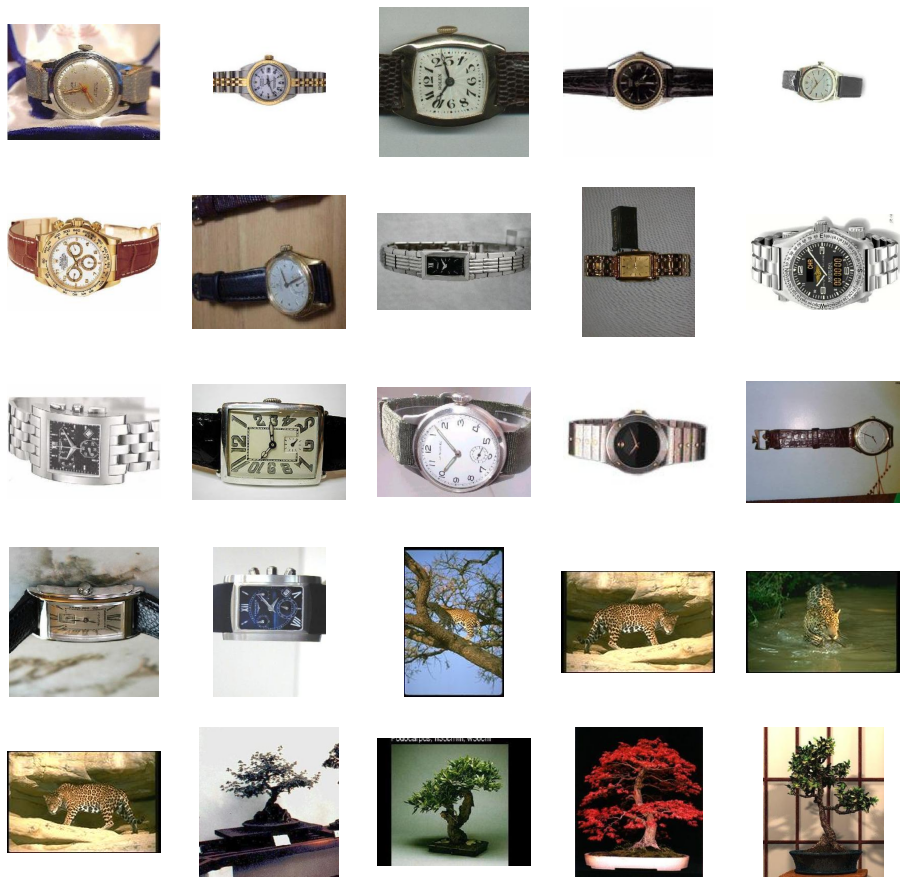

In [45]:
rows = 5
cols = 5
wrong = np.not_equal(guessedlabels,testlabels)
fig = plt.figure(figsize=(16, 16))
count = 0
for index in range(len(wrong)):
    if wrong[index]:
        count = count +1
        image = io.imread(testfilenames[index])
        temp = fig.add_subplot(rows, cols ,count)
        temp.imshow(image)
        temp.axis('off')
    if count==rows*cols:
        break
plt.show()